In [2]:
from typing import Iterable
import numpy as np

from view_sampler import *
from algs import *

import loss_funcs
from evaluate import eval_funcs
from eval_process import evaluate

from evaluate.dataset import Dataset
from evaluate.eval_log import EvalLog
from evaluate.evaluator import Evaluator
from evaluate.dataset import Dataset
from utils.concurrent import TqdmPool

import mealpy

import config
import concurrent
from itertools import product



In [2]:

exec = TqdmPool(max_workers=20)

run_config = MealRunConfig(max_time=60*4, silent=True, seed=1)

dataset = config.EVAL_DATASET

futures = []
# all_optimizers = [alg_name for alg_name in mealpy.get_all_optimizers().keys()]
optimizers = config.ALGORITHM_NAMES[:3]

for idx, alg_name in enumerate(optimizers):
    for obj_name in config.OBJECT_NAMES:
        future = exec.submit(
            evaluate,
            alg_name=alg_name,
            run_config=run_config,
            obj_name=obj_name,
            eval_data=config.EVAL_DATASET,
            log_folder=f"Final_Evaluation2/Eval1/{obj_name}",
            )

        futures.append(future)

        
for future in concurrent.futures.as_completed(futures):
    try:
        future.result()
    except Exception as e:
        print(e)

exec.shutdown(wait=True)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
uni_positions = config.EVAL_DATASET
# uni_positions = Dataset.create_uniform(location=config.OBJ_LOCATION, min_samples=3**3)
# uni_positions.save("EvalDataset2.pkl")

object_name = config.OBJECT_NAMES[7]
with create_viewer(object_name, config.CAMERA_CONFIG, True) as viewer:
    nrows, ncols = (3, 3)
    fig, axes = plt.subplots(nrows, ncols)
    for idx, pos in enumerate(uni_positions):
        col = idx%ncols
        row = math.floor(idx/ncols)
        ax = axes[row, col]
        render = (viewer.get_view_cropped(pos, depth=False)[0])
        # render[render == 0] = 256
        ax.imshow(render)

        # print(pos)
        ax.set_title(f"{idx}::{np.round(pos.orientation, 4)}")

    fig.tight_layout()

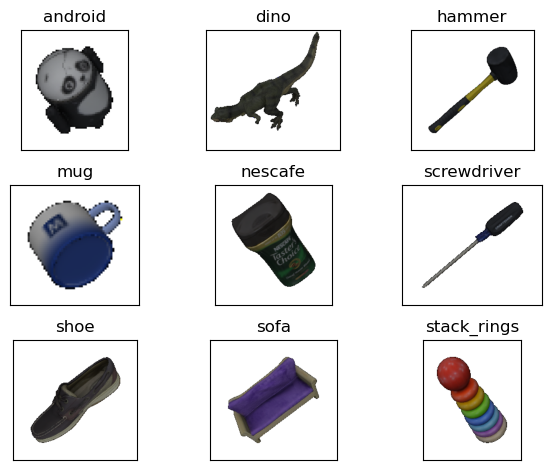

In [36]:
import matplotlib.pyplot as plt
import math
%matplotlib inline


pos = ObjectPosition([0,2.5,4], config.OBJ_LOCATION)
nrows, ncols = (3, 3)
fig, axes = plt.subplots(nrows, ncols)
for idx, object_name in enumerate(config.OBJECT_NAMES):
    with create_viewer(object_name, config.CAMERA_CONFIG, True) as viewer:
        col = idx%ncols
        row = math.floor(idx/ncols)
        ax = axes[row, col]
        render = (viewer.get_view_cropped(pos, depth=False)[0])
        render[render == 0] = 255
        ax.imshow(render)

        # print(pos)
        ax.set_title(f"{object_name}")
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()
# fig.savefig("data/objects.jpg")